In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
df=pd.read_csv('banknotes.csv')

In [3]:
df.shape

(1372, 5)

In [4]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.info

<bound method DataFrame.info of       Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [10]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

#### Seperate the input and output variables

In [13]:
#input data
x=df.drop('Class',axis=1)

#output data
y=df['Class']

In [14]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

#### Explore the data

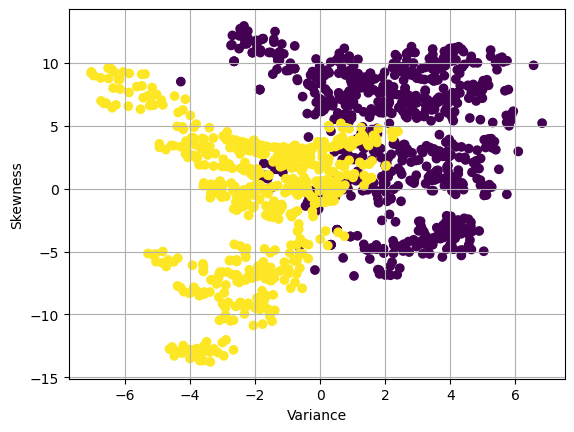

In [21]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(df['Variance'],df['Skewness'], c=y)
plt.grid()

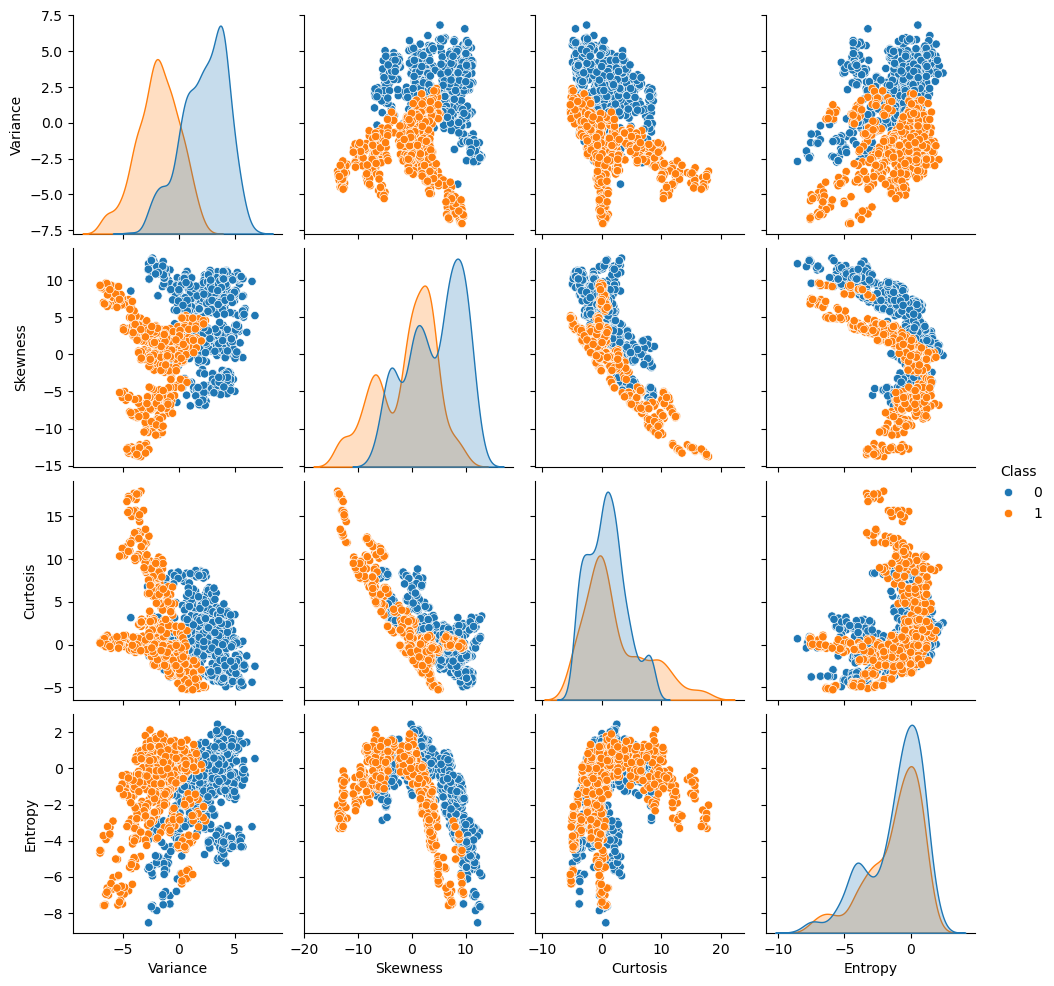

In [22]:
sns.pairplot(df,hue='Class')

In [23]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x1d93fb5bdd0>,
 [Text(-0.19046171571266454, 1.0833855891822581, '762'),
  Text(0.19046171571266443, -1.0833855891822581, '610')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

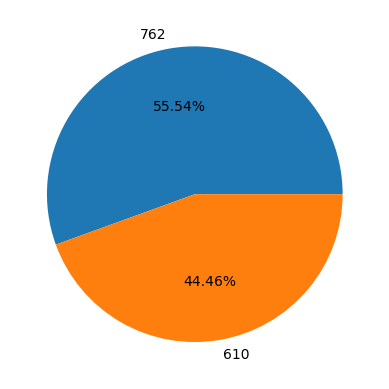

In [29]:
plt.pie(y.value_counts(),labels=y.value_counts(),autopct='%2.2f%%')

In [30]:
#Cross Validation

from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test,y_train, y_test = train_test_split(x, y , random_state=0)

In [35]:
x_train.shape, x_test.shape

((1029, 4), (343, 4))

In [55]:
# Build the model

from sklearn.tree import DecisionTreeClassifier,plot_tree

In [56]:
dt = DecisionTreeClassifier(random_state=0)

In [57]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
y_pred = dt.predict(x_test)

In [59]:
# Performance Evaluation

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [60]:
print(accuracy_score(y_test, y_pred))

0.9795918367346939


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [62]:
print(confusion_matrix(y_test, y_pred))

[[191   4]
 [  3 145]]


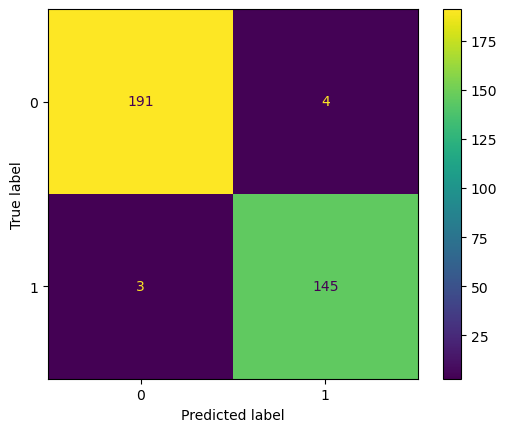

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

### Featrue importance

<BarContainer object of 4 artists>

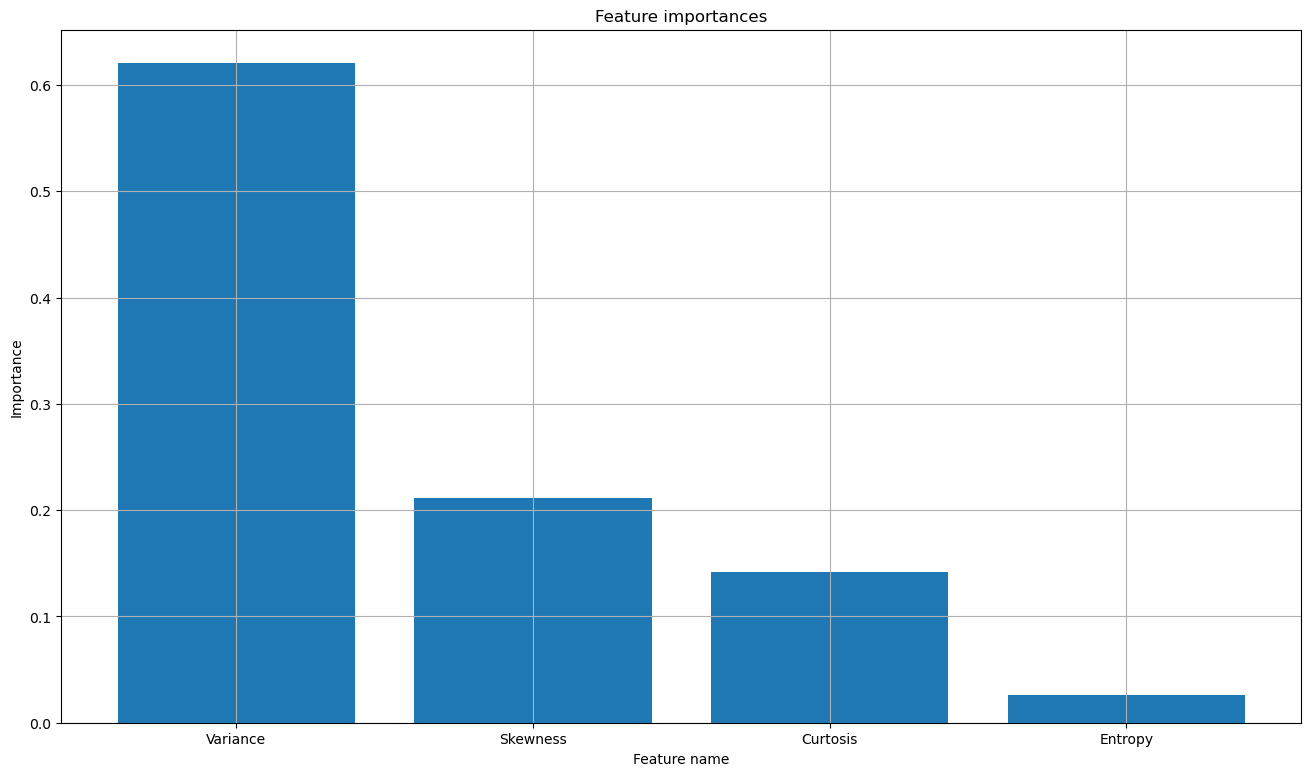

In [64]:
plt.figure(figsize=(16,9))
plt.title('Feature importances')
plt.xlabel('Feature name')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns,dt.feature_importances_)

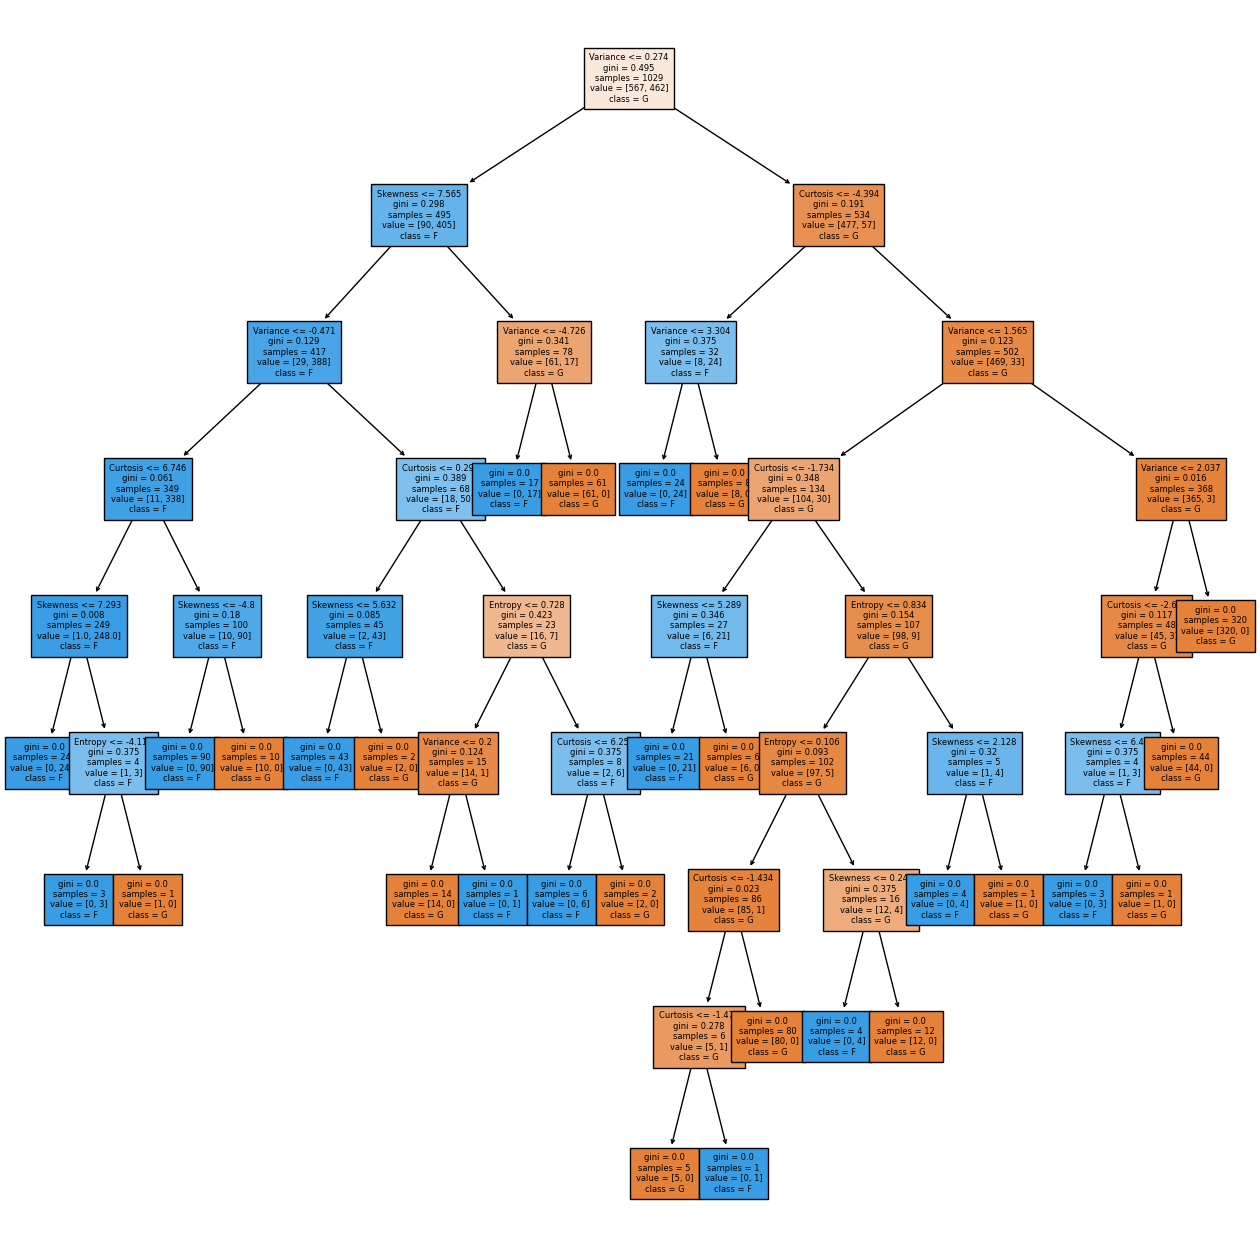

In [72]:
plt.figure(figsize=(16,16))
plot_tree(dt,feature_names=list(x.columns),
        class_names=['G','F'], filled=True,fontsize=6);  #G-> Genuine, F->Fake


In [74]:
new= pd.DataFrame([[0.40614, 1.34920, -1.4501, -0.55949],
                   [3.45660,9.52280,-4.0112,-3.59440],
                   [4.545908,8.16740,-2.4586,-1.46210]], columns=x.columns)

In [75]:
new

,Variance,Skewness,Curtosis,Entropy
0,0.406140,1.3492,-1.4501,-0.55949
1,3.456600,9.5228,-4.0112,-3.59440
2,4.545908,8.1674,-2.4586,-1.46210


In [76]:
y_pred1 = dt.predict(new)

In [77]:
y_pred1 #1->is for fake node and 0->for genuine node

array([1, 0, 0], dtype=int64)

In [78]:
from sklearn.ensemble import RandomForestClassifier


In [80]:
rf =RandomForestClassifier(random_state=0,n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [81]:
rf_pred=rf.predict(x_test)
rf_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [82]:
print(accuracy_score(y_test, rf_pred))

0.9941690962099126


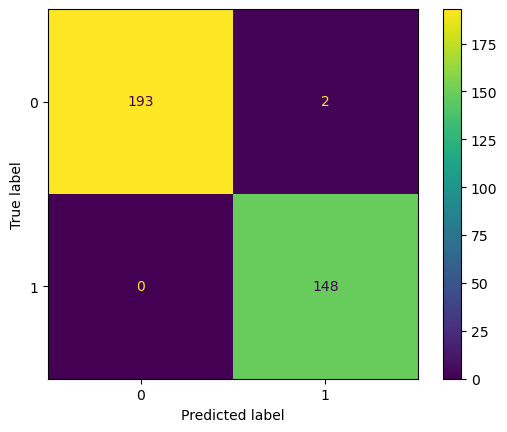

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)